**Please fo through Regression Case study 1 and 2 Prior before starting with this code.**

**It contains data cleaning, Data visualization, Data preprocessing and Analysis which forms the base for understanding the base of this code**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [2]:
sns.set(rc = {'figure.figsize':(11.7,8.27)})

In [3]:
cars_data = pd.read_csv("cars_sampled.csv")
cars = cars_data.copy()

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


**Removing Insignificant columns**

In [5]:
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns = col, axis= 1)

cars.drop_duplicates(keep = 'first', inplace = True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49531 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               49531 non-null  object
 1   offerType            49531 non-null  object
 2   price                49531 non-null  int64 
 3   abtest               49531 non-null  object
 4   vehicleType          44379 non-null  object
 5   yearOfRegistration   49531 non-null  int64 
 6   gearbox              46766 non-null  object
 7   powerPS              49531 non-null  int64 
 8   model                46801 non-null  object
 9   kilometer            49531 non-null  int64 
 10  monthOfRegistration  49531 non-null  int64 
 11  fuelType             45064 non-null  object
 12  brand                49531 non-null  object
 13  notRepairedDamage    39891 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.7+ MB


**Subsetting only the significant Data**

In [6]:
cars = cars[
    (cars["yearOfRegistration"] <= 2020)
    &(cars["yearOfRegistration"] >= 1950)
    &(cars["price"] >= 100)
    &(cars["price"] <= 150000)
    &(cars["powerPS"] >= 10)
    &(cars["powerPS"] <= 500)
]
# Approx 6700 records are dropped

In [7]:
cars['Age'] = (2020 - cars['yearOfRegistration']) + ((cars['monthOfRegistration'])/12)
cars["Age"] = round(cars["Age"], 2)
cars['Age'].describe()

count   42772.000
mean       16.873
std         7.093
min         2.000
25%        12.330
50%        16.830
75%        21.170
max        69.750
Name: Age, dtype: float64

*Further Dropping insignificant variables*

In [8]:
cars = cars.drop(columns = ['yearOfRegistration','monthOfRegistration'])

In [9]:
## Correlation Among Numeric Variables

cars_select1 = cars.select_dtypes(exclude = [object])
correlation = cars_select1.corr()
print(round(correlation,3))
print(cars_select1.corr().loc[:,'price'].abs().sort_values(ascending  = False))

           price  powerPS  kilometer    Age
price      1.000    0.575     -0.440 -0.336
powerPS    0.575    1.000     -0.016 -0.151
kilometer -0.440   -0.016      1.000  0.292
Age       -0.336   -0.151      0.292  1.000
price       1.000
powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64


## Actual code of this Session
We are going to build a linear regression and random forest regression model on 2 sets of data

1. Data obtained by imputing the misssing values

# ===== Model building with imputed data =====

1. for Numerical variable, filling na values with median
2. for categorical variable, filling na values with modal value

In [10]:
cars_imputed = cars.apply(lambda x: x.fillna(x.median())
                         if (x.dtype == 'float' or x.dtype == 'int')
                         else x.fillna(x.value_counts().index[0]))

In [11]:
cars_imputed.isna().sum()

seller               0
offerType            0
price                0
abtest               0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [12]:
cars_imputed2 = cars_imputed.copy()

In [13]:
cars_imputed.to_csv("cars_cleaned_imputed.csv", index = False)

#### converting categorical variables into dummy variables

In [14]:
seller_encoder = LabelEncoder()
cars_imputed['seller'] = seller_encoder.fit_transform(cars_imputed['seller'])

offerType_encoder = LabelEncoder()
cars_imputed['offerType'] = offerType_encoder.fit_transform(cars_imputed['offerType'])

abtest_encoder = LabelEncoder()
cars_imputed['abtest'] = abtest_encoder.fit_transform(cars_imputed['abtest'])

vehicleType_encoder = LabelEncoder()
cars_imputed['vehicleType'] = vehicleType_encoder.fit_transform(cars_imputed['vehicleType'])

gearbox_encoder = LabelEncoder()
cars_imputed['gearbox'] = gearbox_encoder.fit_transform(cars_imputed['gearbox'])

model_encoder = LabelEncoder()
cars_imputed['model'] = model_encoder.fit_transform(cars_imputed['model'])

fuelType_encoder = LabelEncoder()
cars_imputed['fuelType'] = fuelType_encoder.fit_transform(cars_imputed['fuelType'])

brand_encoder = LabelEncoder()
cars_imputed['brand'] = brand_encoder.fit_transform(cars_imputed['brand'])

notRepairedDamage_encoder = LabelEncoder()
cars_imputed['notRepairedDamage'] = notRepairedDamage_encoder.fit_transform(cars_imputed['notRepairedDamage'])

In [15]:
seller_dict = {name: seller_encoder.transform([name])  for name in cars_imputed2['seller'].unique()}

offerType_dict = {name: offerType_encoder.transform([name])  for name in cars_imputed2['offerType'].unique()}

vehicleType_dict = {name: vehicleType_encoder.transform([name])  for name in cars_imputed2['vehicleType'].unique()}

abtest_dict = {name: abtest_encoder.transform([name])  for name in cars_imputed2['abtest'].unique()}

gearbox_dict = {name: gearbox_encoder.transform([name])  for name in cars_imputed2['gearbox'].unique()}

model_dict = {name: model_encoder.transform([name])  for name in cars_imputed2['model'].unique()}

fuelType_dict = {name: fuelType_encoder.transform([name])  for name in cars_imputed2['fuelType'].unique()}

brand_dict = {name: brand_encoder.transform([name])  for name in cars_imputed2['brand'].unique()}

notRepairedDamage_dict = {name: notRepairedDamage_encoder.transform([name])  for name in cars_imputed2['notRepairedDamage'].unique()}

In [16]:
print("seller_dict: \n", seller_dict,"\n")
print("offerType_dict: \n", offerType_dict,"\n")
print("vehicleType_dict: \n", vehicleType_dict,"\n")
print("abtest_dict: \n", abtest_dict,"\n")
print("gearbox_dict: \n", gearbox_dict,"\n")
print("fuelType_dict: \n", fuelType_dict,"\n")
print("brand_dict: \n", brand_dict,"\n")
print("notRepairedDamage_dict: \n", notRepairedDamage_dict,"\n")

seller_dict: 
 {'private': array([1]), 'commercial': array([0])} 

offerType_dict: 
 {'offer': array([0])} 

vehicleType_dict: 
 {'limousine': array([3]), 'suv': array([7]), 'bus': array([0]), 'small car': array([5]), 'coupe': array([2]), 'station wagon': array([6]), 'others': array([4]), 'cabrio': array([1])} 

abtest_dict: 
 {'test': array([1]), 'control': array([0])} 

gearbox_dict: 
 {'manual': array([1]), 'automatic': array([0])} 

fuelType_dict: 
 {'diesel': array([1]), 'petrol': array([6]), 'cng': array([0]), 'lpg': array([4]), 'hybrid': array([3]), 'electro': array([2]), 'other': array([5])} 

brand_dict: 
 {'bmw': array([2]), 'volvo': array([39]), 'volkswagen': array([38]), 'seat': array([30]), 'mercedes_benz': array([20]), 'opel': array([24]), 'skoda': array([31]), 'toyota': array([36]), 'nissan': array([23]), 'sonstige_autos': array([33]), 'mazda': array([19]), 'mitsubishi': array([22]), 'audi': array([1]), 'fiat': array([9]), 'alfa_romeo': array([0]), 'saab': array([29]), '

In [17]:
# cars_imputed.info()

In [18]:
# cars_imputed = pd.get_dummies(cars_imputed, drop_first = True)

### ===== Building model with the Imputed data =====
#### separating input and output variables

In [19]:
x1 = cars_imputed.drop(['price'], axis= 1, inplace = False)
y1 = cars_imputed['price']

#### plotting the variable price

<AxesSubplot:xlabel='price', ylabel='Count'>

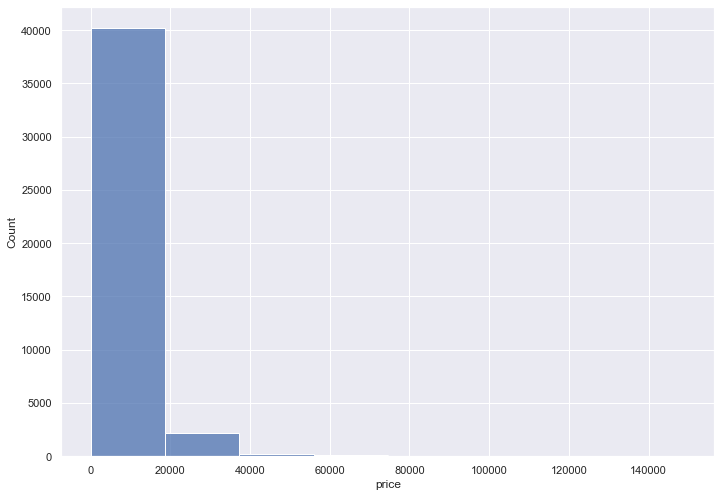

In [20]:
sns.histplot(x = y1, bins = 8)

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

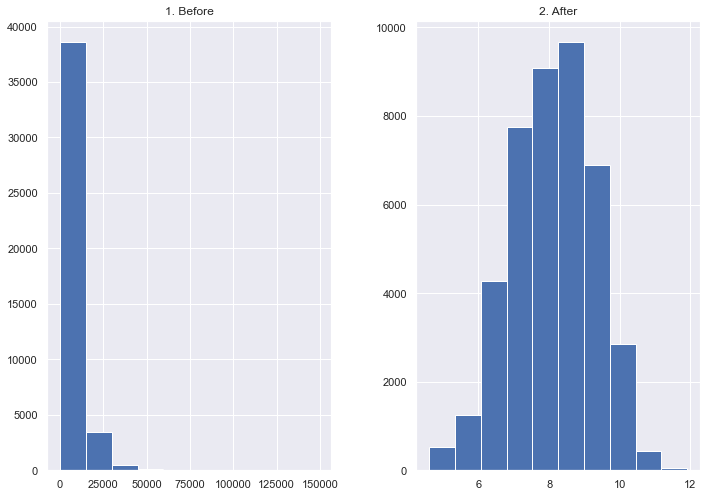

In [21]:
prices = pd.DataFrame({"1. Before": y1, "2. After": np.log(y1)})
prices.hist()

1. for histogram for log(prices)... it is nicely bell shaped
2. for histogram for simply prices... it is a skewed graph

so it is better to go further with natural log of prices and not just with price

So, we will be regressing the natural logarithm of prices with the input features

#### Transforming price as a Logarthmic value

In [22]:
y1 = np.log(y1)

#### Splitting the data into test and train

In [23]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1, y1, test_size = 0.2, random_state = 28)
print(X_train1.shape, X_test1.shape, Y_train1.shape, Y_test1.shape)

(34217, 12) (8555, 12) (34217,) (8555,)


### Baseline Model for the Imputed Data
In baseline model the predicted value is replaced by the mean value of the test data

We are making a base model by using test data mean value

This is to set a benchmark and to compare with our regression model

inshort... setting the base value (base metric)

#### finding mean for test data value

In [24]:
base_pred_1 = np.mean(Y_test1)
print(base_pred_1)

8.090174745275364


#### Repeating the same value till the length of test data

In [25]:
base_pred_1 = np.repeat(base_pred_1, len(Y_test1))

#### Finding RMSE (Root Mean Square Error)
1. it computes the difference between test value and predicted value .... squares them... and divides by the no. of observations
2. this is the mean squared error
3. when you take the squareroot of mean squared error... you get RMSE value

In [26]:
base_root_mean_square_error_1 = np.sqrt(mean_squared_error(Y_test1, base_pred_1))
print(base_root_mean_square_error_1)

1.1776696728811618


In [27]:
print(np.exp(base_root_mean_square_error_1))

3.246799275886661


## Linear Regression with Imputed Data

In [28]:
lnr = LinearRegression(fit_intercept = True)

#### model

In [29]:
model_lin1 = lnr.fit(X_train1, Y_train1)

In [30]:
r2_lin_train1 = model_lin1.score(X_train1, Y_train1)
r2_lin_test1 = model_lin1.score(X_test1, Y_test1)
print(f"Linear Regression Accuracy Score for training set (Imputing missing values): {r2_lin_train1}\n\
Linear Regression Accuracy Score for testing set (Imputing missing values): {r2_lin_test1}")

Linear Regression Accuracy Score for training set (Imputing missing values): 0.6335403832580472
Linear Regression Accuracy Score for testing set (Imputing missing values): 0.6375913248031


#### Predicting model on test set

In [31]:
cars_predictions_lin1 = lnr.predict(X_test1)

#### calculating MSE and RMSE for predictions


In [32]:
lin_mse1 = mean_squared_error(Y_test1, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.7089617160145315



it should be noted that the RMSE valus has dropped from 1.17 to 0.70 (Approx 40% reduction)

But, 0.63 is still higher than 0.54 in the case of omitting missing values. this is because the missing values are imputed by us

R squared value
it helps to tell you how good is your model able to explain the variability in 'Y'

In [33]:
r2_lin_train1 = model_lin1.score(X_train1, Y_train1)
r2_lin_test1 = model_lin1.score(X_test1, Y_test1)
print(f"r2_lin1_train1: {r2_lin_train1}\nr2_lin1_test1: {r2_lin_test1}")

r2_lin1_train1: 0.6335403832580472
r2_lin1_test1: 0.6375913248031


R sq. value for train set is 0.63 and R sq. value for test set is 0.637

This tells that the model is only able to grasp 63% variability from the dataset

## Random Forest regressor using Imputed data
### Parameters


#### n_estimators: 'int' (def 100)
Number of trees in the forest
#### min_samples_split: 'int' or 'float' (def 2)
Minimum No. of samples required to split an internal node
#### min_samples_leaf: int or float (def 1)
Minimum No. of samples required to be at a leaf node. A split point will be considered only if it leaves at least (Min_samples_leaf) training samples in each of left and right branches

#### max_features: {'auto', 'sqrt', 'log'}, int, float  (def 'auto')
No. of features to be considered to build the model
1. if 'auto', then max_features = n_features (chooses the features automatically)
2. if 'sqrt', then max_features = sqrt(n_features)
3. if 'log', then max_features = log(n_features)
4. if int, then consider (int) features at each split

#### max_depth: int (def None)
The maximum depth of the tree. If None, nodes are expanded untill all leaves are pure or until all leaves contain less than min_samples_split

#### criterion: {'mse', 'mae'} (def: 'mse')
#### random_state: int
it is a predefined algorithm for randomizer.... if not specified, it will take different data sets everytime

In [34]:
rf = RandomForestRegressor(n_estimators = 100,
                          max_features = 'auto',
                          max_depth = 100,
                          min_samples_split = 10,
                          min_samples_leaf = 4,
                          random_state = 1)

#### model

In [35]:
model_rf1 = rf.fit(X_train1, Y_train1)

In [36]:
r2_rf_train1 = model_rf1.score(X_train1, Y_train1)
r2_rf_test1 = model_rf1.score(X_test1, Y_test1)
print(f"Random Forest Accuracy Score for training set (Imputing missing values): {r2_rf_train1}\n\
Random Forest Accuracy Score for testing set (Imputing missing values): {r2_rf_test1}")

Random Forest Accuracy Score for training set (Imputing missing values): 0.9065558903453844
Random Forest Accuracy Score for testing set (Imputing missing values): 0.8395275776176175


#### Predicting model on test set

In [37]:
cars_predictions_rf1 = rf.predict(X_test1)

#### Computing MSE and RMSE values

In [38]:
rf_mse1 = mean_squared_error(Y_test1, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4717628034485344


Thus, it should be noted that Random Forest model is performing better than the Linear regression model as the RMSE model has come down from 0.70 (Linear Reg) to 0.47 (RFR)

#### R squared value

In [39]:
r2_rf_train1 = model_rf1.score(X_train1, Y_train1)
r2_rf_test1 = model_rf1.score(X_test1, Y_test1)
print(f"r2_rf_train1: {r2_rf_train1}\nr2_lin1_test1: {r2_rf_test1}")

r2_rf_train1: 0.9065558903453844
r2_lin1_test1: 0.8395275776176175


# FINAL OUTPUT

In [40]:
# FOR OMITTED DATA
print(f"Metrics for models built from data where missing values are imputed")
print(f"Base RMSE value = {base_root_mean_square_error_1}")
print(f"RMSE value for linear Regression model = {lin_rmse1}")
print(f"RMSE value for Random Forest model = {rf_rmse1}")
print(f"Accuracy Score for training set from linear regression = {r2_lin_train1}")
print(f"Accuracy Score for testing set from linear regression = {r2_lin_test1}")
print(f"Accuracy Score for training set from random forest regressor = {r2_rf_train1}")
print(f"Accuracy Score for testing set from random forest regressor = {r2_rf_test1}")

Metrics for models built from data where missing values are imputed
Base RMSE value = 1.1776696728811618
RMSE value for linear Regression model = 0.7089617160145315
RMSE value for Random Forest model = 0.4717628034485344
Accuracy Score for training set from linear regression = 0.6335403832580472
Accuracy Score for testing set from linear regression = 0.6375913248031
Accuracy Score for training set from random forest regressor = 0.9065558903453844
Accuracy Score for testing set from random forest regressor = 0.8395275776176175


In [41]:
import pickle
with open('RFR_model_by_imputing_NA_Values.pkl', 'wb') as f:
    pickle.dump(rf , f)
with open('Lin_reg_model_by_imputing_NA_Values.pkl', 'wb') as f:
    pickle.dump(lnr , f)

In [42]:
def seller():
    seller = str(input("Enter the Seller Type (default: 'Private'). Type 'C' for commercial: ")).upper()
    if seller == 'P':
        seller = 'private'
    elif seller == 'C':
        seller = 'commercial'
    else:
        seller = 'private'
    return seller
    
# print(seller())

In [43]:
offerType = 'offer'

In [44]:
def abtest():
    abtest = str(input("Enter the Abs test status (default: 'Test'). Type 'C' for Control: ")).upper()
    if abtest == 'T':
        abtest = 'test'
    elif abtest == 'C':
        abtest = 'control'
    else:
        abtest = 'test'
    return abtest

# print(abtest())

In [45]:
def vehicleType():
    vType = str(input("Enter Vehicle type: bus/cabrio/coupe/limousine/small car/station wagon/suv/others : ")).lower()
    if vType in ['bus','cabrio','coupe','limousine','small car','station wagon','suv','others']:
        return vType
    else:
        return vehicleType()
        

# print(vehicleType())

In [46]:
def gearbox():
    gearbox = str(input("Enter the gearbox type (default: 'Manual'). Type 'A' for Automatic: ")).upper()
    if gearbox == 'A':
        gearbox = 'automatic'
    elif gearbox == 'M':
        gearbox = 'manual'
    else:
        gearbox = 'manual'
    return gearbox
    
# print(gearbox())

In [47]:
def powerPS():
    powerPS = int(input("enter the HorsePower (range 0 to 300): "))
#     if type(powerPS) == int:
#         if 0<powerPS<300:
#             pass
#         else:
#             powerPS()
#     else:
#         powerPS()
    return powerPS

# print(powerPS())

## Need to look for exception handling

In [48]:
def age():
    reg = int(input('Enter Year of registration: '))
    age = 0
    if type(reg) == int:
        age = 2022 - reg
        return age
    else:
        print("invalid input")
        age()

# print(age())

## Need to look for exception handling for strings

In [49]:
def km():
    km = float(input("Enter the km travelled: "))
    return km

## Need to look for exception handling for negative nos and strings

# print(km())

In [50]:
def damage():
    damage = input("Have the previous damages been repaired? (default: NO). Type 'Y' for yes: ").upper()
    if damage == 'Y':
        damage = 'no'
    elif damage == 'N':
        damage = 'yes'
    else:
        damage = 'yes'
    
    return damage

# print(damage())

In [51]:
def brand():
    br = input("Enter brand name from ['volvo', 'seat', 'volkswagen', 'mercedes_benz', 'opel', 'skoda', 'toyota','nissan',\
    'mazda', 'mitsubishi', 'audi', 'fiat', 'alfa_romeo', 'saab', 'bmw', 'peugeot', 'land_rover', 'subaru',\
    'citroen', 'jeep', 'chrysler', 'ford', 'renault', 'dacia', 'chevrolet', 'smart', 'mini', 'trabant', 'suzuki',\
    'hyundai', 'honda', 'jaguar', 'porsche', 'kia', 'daihatsu', 'lancia', 'daewoo', 'rover', 'lada']: ").lower()
    
    if br in ['volvo', 'seat', 'volkswagen', 'mercedes_benz', 'opel', 'skoda', 'toyota','nissan',\
                  'mazda', 'mitsubishi', 'audi', 'fiat', 'alfa_romeo', 'saab', 'bmw', 'peugeot', 'land_rover', 'subaru',\
                  'citroen', 'jeep', 'chrysler', 'ford', 'renault', 'dacia', 'chevrolet', 'smart', 'mini', 'trabant', 'suzuki',\
                  'hyundai', 'honda', 'jaguar', 'porsche', 'kia', 'daihatsu', 'lancia', 'daewoo', 'rover', 'lada']:
        return br
    else:
        print('invalid input')
        return brand()

# print("\n",brand())

In [52]:
def fueltype():
    fuelT = input("Enter the car  fuel Type from ['diesel', 'petrol', 'cng', 'lpg', 'hybrid', 'electro', 'other']: ").lower()
    
    if fuelT in ['diesel', 'petrol', 'cng', 'lpg', 'hybrid', 'electro', 'other']:
        return fuelT
    else:
        print('invalid input')
        return fueltype()

# print(fueltype())

In [53]:
def model():
    mod = input("enter model name: ")
    if mod in ['xc_reihe', 'ibiza', 'passat', 'clk', 'vectra', 'octavia', 'a_klasse', 'astra',\
               'yaris', 'meriva', 'others', 'golf', '3_reihe', 'colt', '80', 'panda', 'micra',\
               '156', 'c_klasse', '1er', '3er', 'freelander', 'a4', 'e_klasse', 'forester',\
               '5er', 'grand', 'voyager', 'polo', 'fiesta', 'clio', 'a3', 'slk', 'x_reihe',\
               'fabia', 'logan', '500', 'punto', 'berlingo', 's_klasse', '2_reihe', 'galaxy',\
               'agila', 'touran', 'captiva' ,'scenic', 'mondeo', 'omega', 'a6', 'fortwo',\
               'scirocco', 'transporter', 'c4', 'qashqai', 'ka', 'clubman', 'sharan',\
               'insignia', '7er', 'megane', 'corsa', 'arosa', 'z_reihe', 'caddy', 'aygo',\
               'matiz', 'focus', 'sl', 'combo', 'corolla', '601', 'c_reihe', 'beetle', 'tigra',\
               'twingo', 'tiguan', 'cooper', 's_max', 'toledo', 'carisma', 'zafira', 'a2',\
               'primera', 'a5' ,'tt', 'citigo' ,'tucson', 'accord', 'rav', 'i_reihe', 'laguna',\
               'roadster', 'bora', 'kuga', '147', 'c1', 'civic', 'mustang', 'lupo', 'c5',\
               'mx_reihe' ,'cayenne', 'justy' ,'santa' ,'transit', 'up', 'yeti', 'modus',\
               'rx_reihe' ,'sprinter', 'forfour' ,'cherokee', 'cordoba' ,'v40' ,'navara', 'v70',\
               'q3' ,'sorento', 'verso', 'kaefer', 'v_klasse', 'doblo' ,'1_reihe', 'fox',\
               '6_reihe', 'altea', 'almera', 'leon', 'boxster' ,'calibra' ,'q5', '911',\
               'x_trail', 'v50', 'impreza', 'swift', 'm_klasse', 'jetta' ,'escort' ,'eos', '100',\
               'sandero', '4_reihe', '300c', 'bravo' ,'stilo', 'a1', 'cl', 'kangoo', 'one',\
               'pajero', 'ducato', 'vivaro', 'touareg', 'cr_reihe', '850' ,'q7' ,'duster',\
               'kadett', 'cx_reihe' ,'ceed', 'rio','seicento', 'b_klasse', 'musa' ,'cc',\
               'c_max', 'getz', 'c2', '5_reihe', '900', 'kalos', 'ypsilon', 'jazz', 'ptcruiser',\
               'sportage', 'vito', 'c3', 'signum' ,'aveo', 'jimny', 'note' ,'avensis', 'm_reihe',\
               'auris' ,'espace', 'picanto', 'juke', 'lancer', '6er', 'phaeton', 'x_type',\
               'range_rover_sport', 'spark', 'viano', 'superb', '159', 'alhambra', 'fusion',\
               'a8' ,'legacy', 'amarok' ,'galant', 's60' ,'glk', 'wrangler' ,'9000' ,'roomster',\
               'carnival', 'i3', 'exeo', 'outlander', 'b_max', 'antara', '90', 'niva', 'r19',\
               'sirion', 'nubira', 'g_klasse' ,'spider', 'mii' ,'cuore', 'lodgy', 'crossfire',\
               'range_rover_evoque', 'terios' ,'serie_2', 'lanos', 'range_rover', '200',\
               's_type', 'materia' ,'defender', 'lybra', 'croma', 'discovery', 'v60', 'serie_3',\
               'move' ,'delta', 'gl', 'kalina', 'charade', 'rangerover']:
        return mod
    else:
        print("Oops!!! sorry, the specified model does not exist in the database. Please specify another model.")
        return model()
    
# print(model())

In [54]:
# model_rf1.predict([[
#     seller_encoder.transform(['private']),
#     offerType_encoder.transform(['offer']),
#     abtest_encoder.transform(['test']),
#     vehicleType_encoder.transform(['cabrio']),
#     gearbox_encoder.transform(['manual']),
#     130,
#     model_encoder.transform(['80']),
#     150000,
#     fuelType_encoder.transform(['petrol']),
#     brand_encoder.transform(['audi']),
#     notRepairedDamage_encoder.transform(['no']),
#     2
# ]])

In [55]:
# np.exp(model_rf1.predict([[
#     seller_encoder.transform(['private']),   ## seller_encoder.transform([seller()])
#     offerType_encoder.transform(['offer']),  ## let it be same
#     abtest_encoder.transform(['test']),      ## abtest_encoder.transform([abtest()])
#     vehicleType_encoder.transform(['limousine']),## recursive function ??...made, check once
#     gearbox_encoder.transform(['manual']),    ## gearbox_encoder.transform([gearbox()])
#     140,                                      ## powerPS()
#     model_encoder.transform(['passat']),      ## model_encoder.transform([model()])
#     150000,                                   ## km()
#     fuelType_encoder.transform(['diesel']),   ## fuelType_encoder.transform([fueltype()])
#     brand_encoder.transform(['volkswagen']),       ## brand_encoder.transform([brand()])
#     notRepairedDamage_encoder.transform(['no']),## notRepairedDamage_encoder.transform([damage()])
#     15                                     ## age()
# ]]))

In [56]:
cars.loc[38703]

seller                     private
offerType                    offer
price                        20800
abtest                     control
vehicleType                    bus
gearbox                  automatic
powerPS                        156
model                     b_klasse
kilometer                    20000
fuelType                    petrol
brand                mercedes_benz
notRepairedDamage               no
Age                          8.670
Name: 38703, dtype: object

In [57]:
np.exp(model_rf1.predict([[
    seller_encoder.transform([seller()]),
    offerType_encoder.transform(['offer']),
    abtest_encoder.transform([abtest()]),
    vehicleType_encoder.transform([vehicleType()]),
    gearbox_encoder.transform([gearbox()]),
    powerPS(),
    model_encoder.transform([model()]),
    km(),
    fuelType_encoder.transform([fueltype()]),
    brand_encoder.transform([brand()]),
    notRepairedDamage_encoder.transform([damage()]),
    age()
]]))

KeyboardInterrupt: Interrupted by user